In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
import pmdarima as pm
import math

Importing plotly failed. Interactive plots will not work.


In [2]:
energy_sector_pd = pd.read_csv('KU_energy_sector_export.csv')
energy_sector_pd['date'] = pd.to_datetime(energy_sector_pd['date'])

In [3]:
energy_sector_pd = energy_sector_pd.set_index('date')

In [6]:
df_occidental = energy_sector_pd[['oxy']]

Text(0.5, 1.0, 'Occidental Closing Price')

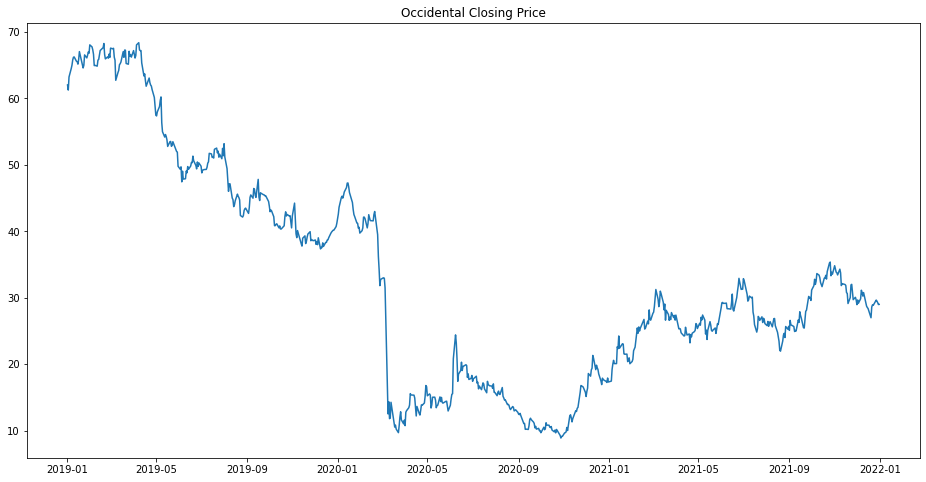

In [8]:
#plot
plt.figure(figsize=(16,8))
plt.plot(energy_sector_pd['oxy'], label='Close Price History')
plt.title('Occidental Closing Price')

Text(0.5, 1.0, 'S&P Closing Price')

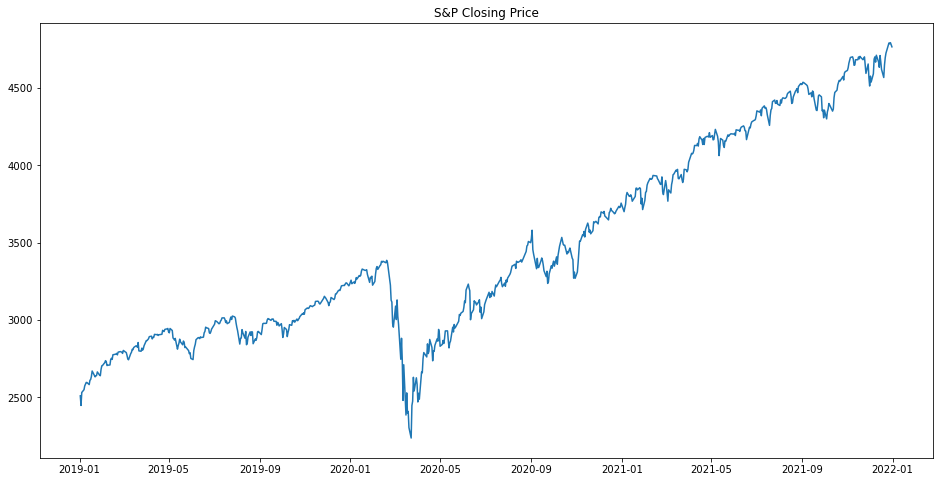

In [9]:
plt.figure(figsize=(16,8))
plt.plot(energy_sector_pd['spstock'], label='Close Price History')
plt.title('S&P Closing Price')


Text(0.5, 1.0, 'Energy Closing Price')

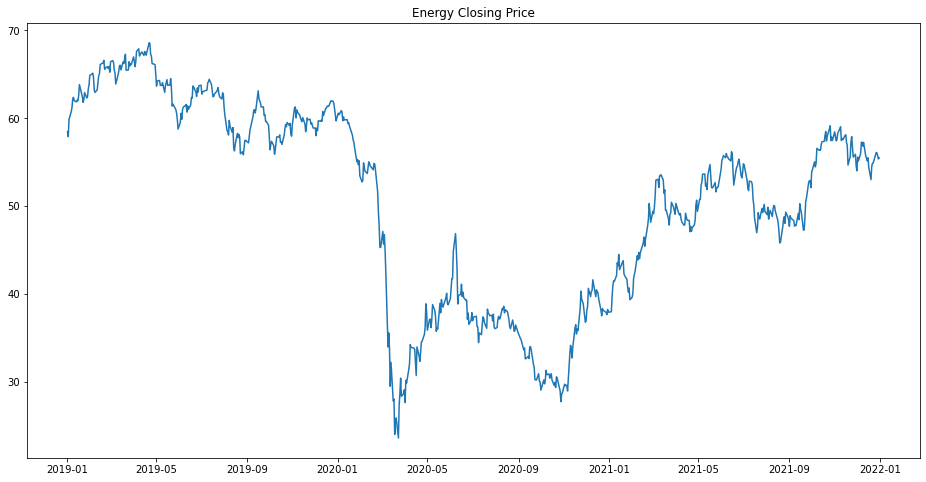

In [11]:
plt.figure(figsize=(16,8))
plt.plot(energy_sector_pd['energy_sector'], label='Close Price History')
plt.title('Energy Closing Price')

<AxesSubplot:ylabel='Density'>

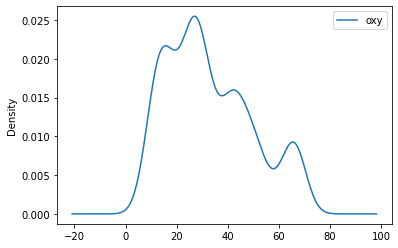

In [12]:
df_occidental_close = df_occidental[['oxy']]
df_occidental_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

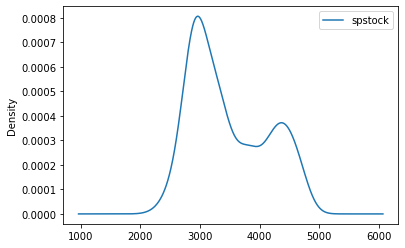

In [13]:
df_sp_close = energy_sector_pd[['spstock']]
df_sp_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

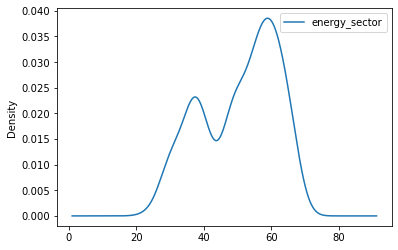

In [14]:
df_energy_close= energy_sector_pd[['energy_sector']]
df_energy_close.plot(kind='kde')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

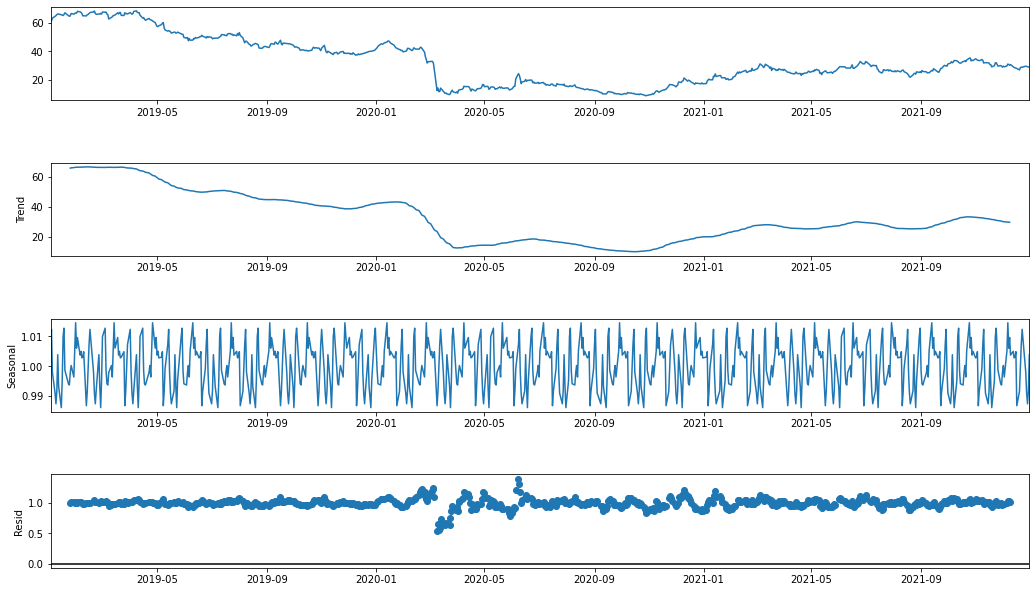

In [15]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_occidental_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

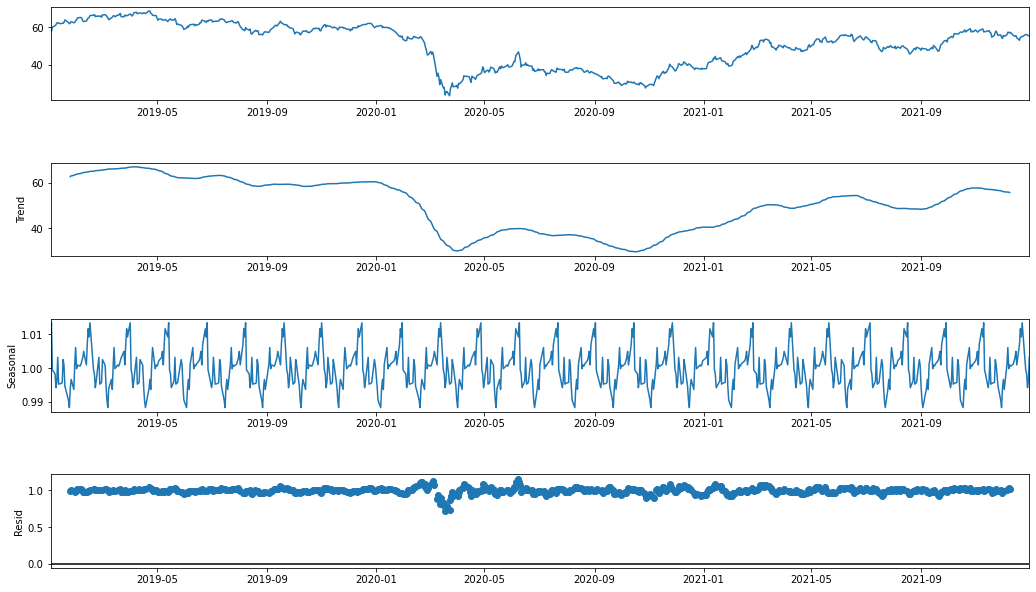

In [16]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_energy_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

Since data is not stationary we will preform log transformation to eliminate trend

In [17]:
df_occidental_log = np.log(df_occidental_close)

In [18]:
df_energy_log = np.log(df_energy_close)

Split data into train and test sets

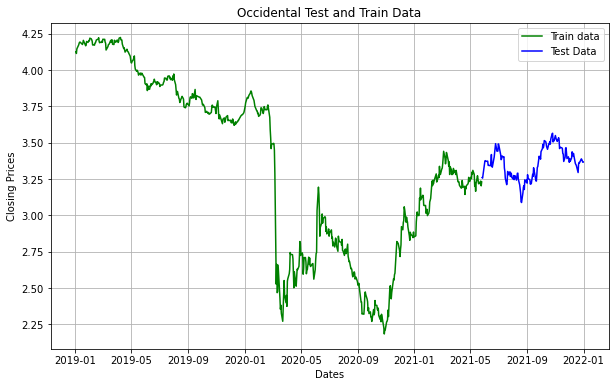

In [19]:
occidental_train_data= df_occidental_log.iloc[:int(df_occidental_log.shape[0]*0.8)]
occidental_test_data = df_occidental_log.iloc[int(df_occidental_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(occidental_train_data, 'Green', label='Train data')
plt.plot(occidental_test_data, 'blue',  label='Test Data')
plt.title('Occidental Test and Train Data')
plt.legend()

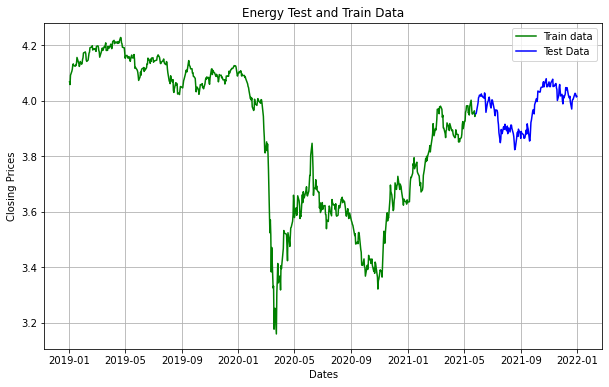

In [20]:
energy_train_data= df_energy_log.iloc[:int(df_energy_log.shape[0]*0.8)]
energy_test_data = df_energy_log.iloc[int(df_energy_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(energy_train_data, 'Green', label='Train data')
plt.plot(energy_test_data, 'blue',  label='Test Data')
plt.title('Energy Test and Train Data')
plt.legend()

This Machine Learning Model will run a linear regression, ARIMA, and a Facebook Prophet Model
-some limitations of these models will be they do not take into accoutn current world sitations (like COVID impacts on the economy)

Linear Regression Model

In [21]:
df_linear_oxy = energy_sector_pd[['oxy', 'spstock']]

In [22]:
df_linear_energy = energy_sector_pd[['energy_sector', 'spstock']]

In [23]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_oxy[['oxy']], df_linear_oxy[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for Occidental Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for Occidental Linear Regression
MSE: 372582.0436661957
MAE: 511.17695489659417
RMSE: 610.394989876388
MAPE: spstock    0.146653
dtype: float64


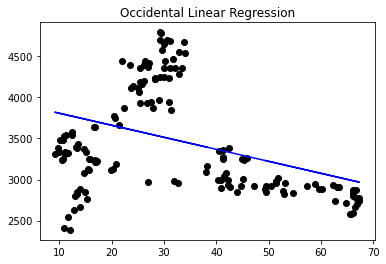

In [24]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Occidental Linear Regression')
plt.show()

In [25]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_energy[['energy_sector']], df_linear_energy[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for Energy Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for Energy Linear Regression
MSE: 420378.3620575831
MAE: 578.517271336367
RMSE: 648.3659167920405
MAPE: spstock    0.173546
dtype: float64


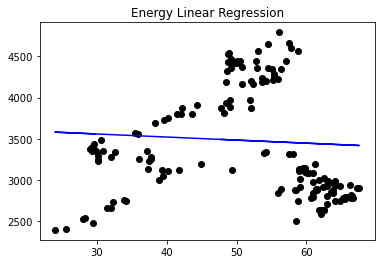

In [26]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Energy Linear Regression')
plt.show()

ARIMA Model


In [27]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(occidental_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(occidental_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1821.706, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1820.618, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1818.620, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1818.620, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1822.152, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1816.914, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.935 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
#Modeling
arima_model = ARIMA(occidental_train_data, order=(0,1,0))
arima_fitted = arima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51045D+00    |proj g|=  1.75415D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     10      1     0     0   1.732D-06  -1.510D+00
  F =  -1.5104453253721621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

In [29]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(occidental_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=occidental_test_data.index)
lower_series = pd.Series(conf[:,0], index=occidental_test_data.index)
upper_series = pd.Series(conf[:,1], index=occidental_test_data.index)

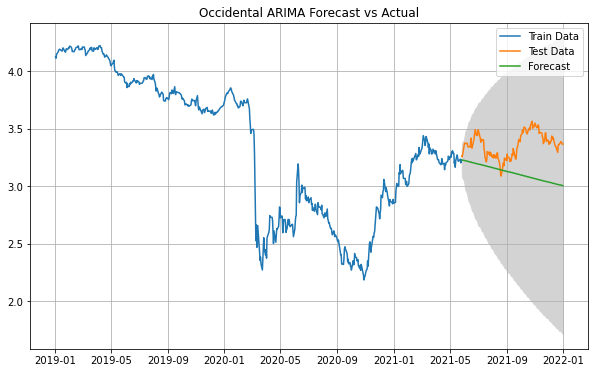

In [31]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(occidental_train_data, label='Train Data')
plt.plot(occidental_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Occidental ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [32]:
# ARIMA Model Statistics
mse = mean_squared_error(occidental_test_data, arima_forecast)
print('Error Statistics for Occidental ARIMA Model')
print('MSE: ' + str(mse))
mae = mean_absolute_error(occidental_test_data, arima_forecast)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(occidental_test_data, arima_forecast))
print('RMSE: '+str(rmse))

Error Statistics for Occidental ARIMA Model
MSE: 0.08110837436997503
MAE: 0.24955045434027584
RMSE: 0.2847953201335567


In [33]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(energy_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(energy_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2624.789, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2620.893, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2624.355, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2623.402, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2622.863, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2626.786, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2628.784, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2626.785, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2624.812, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2624.787, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2630.750, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2625.367, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2628.515, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-2628.758, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
#Modeling
arima_model = ARIMA(energy_train_data, order=(0,1,2))
arima_fitted = arima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.18277D+00    |proj g|=  7.21201D-05

At iterate    5    f= -2.18277D+00    |proj g|=  2.90878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     19      1     0     0   6.661D-07  -2.183D+00
  F =  -2.1827681875090366     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

In [35]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(energy_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=energy_test_data.index)
lower_series = pd.Series(conf[:,0], index=energy_test_data.index)
upper_series = pd.Series(conf[:,1], index=energy_test_data.index)

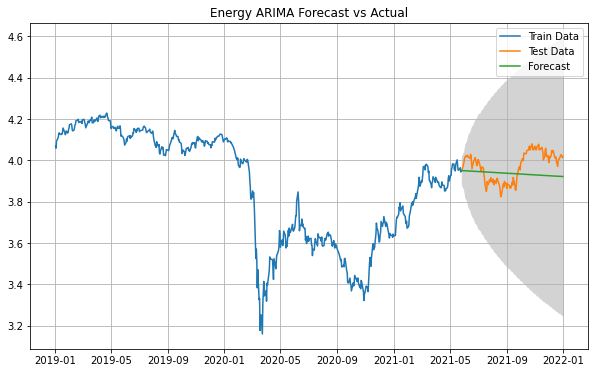

In [36]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(energy_train_data, label='Train Data')
plt.plot(energy_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Energy ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [37]:
# ARIMA Model Statistics
print('Error Statistics for Energy ARIMA Model')
mse = mean_squared_error(energy_test_data, arima_forecast)
print('MSE: ' + str(mse))
mae = mean_absolute_error(energy_test_data, arima_forecast)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(energy_test_data, arima_forecast))
print('RMSE: '+str(rmse))

Error Statistics for Energy ARIMA Model
MSE: 0.006725695941004993
MAE: 0.07308758895559024
RMSE: 0.08201034045170763


Facebook Prophet Model

In [38]:

prophet_data = pd.DataFrame()
prophet_data['y'] = df_occidental_log['oxy']
prophet_data['ds'] = energy_sector_pd.index

#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.21267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1654.21     0.0197334       277.185           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1676.33    0.00181512       231.343       1.555      0.1555      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       1679.87   0.000334334       184.906    3.14e-06       0.001      363  LS failed, Hessian reset 
     299       1680.46    0.00606306       79.2123           1           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1691.54   0.000376197       68.1245      0.4234           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     464       1694.35   0.000491092    

In [39]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

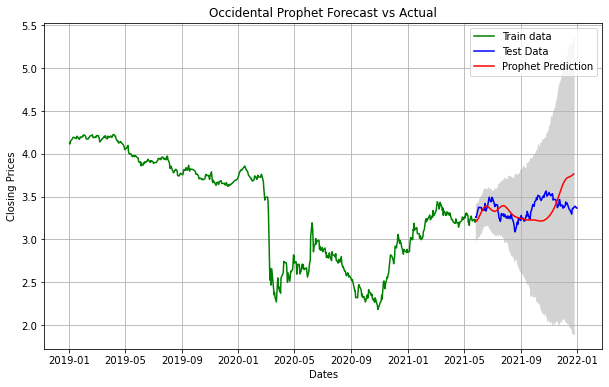

In [40]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(occidental_train_data, 'Green', label='Train data')
plt.plot(occidental_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Occidental Prophet Forecast vs Actual')
plt.legend()

In [41]:
#Prophet Model Statistics
print('Error Statistics for Occidental Prophet Model')
mse = mean_squared_error(occidental_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(occidental_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(occidental_test_data, forecast['Prediction']))
print('RMSE: '+str(rmse))

Error Statistics for Occidental Prophet Model
MSE: 0.03510719887479559
MAE: 0.14865786710851042
RMSE: 0.1873691513424651


In [42]:
prophet_data = pd.DataFrame()
prophet_data['y'] = df_energy_log['energy_sector']
prophet_data['ds'] = energy_sector_pd.index


#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.35406
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2057.09     0.0282711       1477.63           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2125.02    0.00478212       632.718           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2167.85    0.00756497       306.395           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2186.85    0.00316618       751.598      0.3417           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2204.28     0.0012435       181.079      0.8841      0.8841      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [43]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

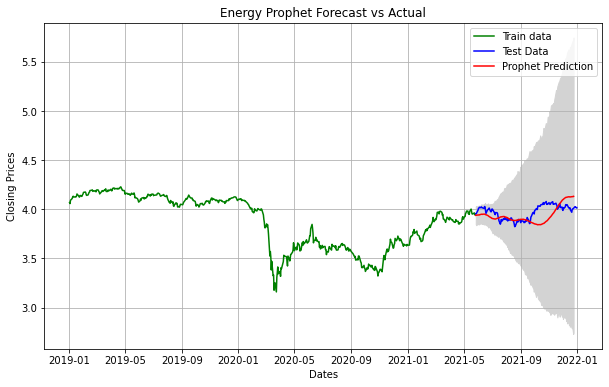

In [44]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(energy_train_data, 'Green', label='Train data')
plt.plot(energy_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index,forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Energy Prophet Forecast vs Actual')
plt.legend()

In [45]:
#Prophet Model Statistics
print('Error Statistics for Energy Prophet Model')
mse = mean_squared_error(energy_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(energy_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(energy_test_data, forecast['Prediction']))
print('RMSE: '+str(rmse))

Error Statistics for Energy Prophet Model
MSE: 0.009454070154521458
MAE: 0.07613386178760942
RMSE: 0.09723204283836404
